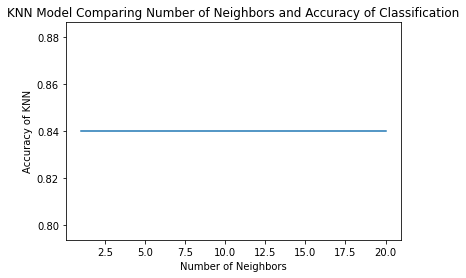

In [2]:
"""
Project: Homework 1, KNeighborsClassifier

Authors:
Matthew Carroll
Mark Carroll
Kevin Boyle

Purpose:
Perform KNN algorithm on iris data set for k values from 1 to 20.
Plot accuracy for each corresonding to each k value
"""

import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Function to grab dataset and divide data into test and trainging set
def loadDataset(url, split):
	trainingSet=[]
	testSet=[]
	df = pd.read_csv(url, header=None)
	array = df.to_numpy()
	random.shuffle(array)
	training_len = int(len(array)*split)
	trainingSet = array[:training_len]
	testSet = array[training_len:]
	return trainingSet, testSet

def main():
    # prepare data
    trainingSet = []
    testSet = []
    split = 0.67
    url = "https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data"
    # Create training and test data sets
    trainingSet, testSet = loadDataset(url, split)
    X = trainingSet[:, :4]
    y = trainingSet[:, 4]
    scores = []
    kValues = []
    k = 1
    # While loop to iterate through k values from 1 to 20
    while k <= 20:
        sum = 0
        samples = 5
        # For loop to create model for each k value for 5 samples then average the samples together
        for i in range(samples):
            neigh = KNeighborsClassifier(n_neighbors=k)
            neigh.fit(X, y)
            expected = neigh.predict(testSet[:, :4])
            sum += neigh.score(testSet[:, :4], testSet[:, 4])
        # Append k and accuracy to lists
        kValues.append(k)
        scores.append(sum/samples)
        k += 1
    # Plot k values and corresponding accuracy
    plt.plot(kValues, scores)
    plt.xlabel("Number of Neighbors")
    plt.ylabel("Accuracy of KNN")
    plt.title("KNN Model Comparing Number of Neighbors and Accuracy of Classification")
    plt.show()

main()